<a href="https://colab.research.google.com/github/greatermonk/image-classification-using-cifar-10-dataset/blob/main/Cifar_100_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/12
938/938 [==============================] - 22s 22ms/step - loss: 1.6625 - accuracy: 0.4203 - val_loss: 1.3742 - val_accuracy: 0.5081
Epoch 2/12
938/938 [==============================] - 16s 17ms/step - loss: 1.2951 - accuracy: 0.5476 - val_loss: 1.3466 - val_accuracy: 0.5258
Epoch 3/12
938/938 [==============================] - 18s 19ms/step - loss: 1.1477 - accuracy: 0.6006 - val_loss: 1.1848 - val_accuracy: 0.5814
Epoch 4/12
938/938 [==============================] - 16s 18ms/step - loss: 1.0151 - accuracy: 0.6452 - val_loss: 1.1590 - val_accuracy: 0.6022
Epoch 5/12
938/938 [==============================] - 19s 21ms/step - loss: 0.9046 - accuracy: 0.6794 - val_loss: 1.2065 - val_accuracy: 0.5942
Epoch 6/12
938/938 [==============================] - 16s 17ms/step - loss: 0.7724 - accuracy: 0.7289 - val_loss: 1.3011 - val_accuracy: 0.6053
Epoch 7/12
938/938 [==============================] - 18s 19ms/step - loss: 0.6816 - accuracy: 0.7607 - val_loss: 1.4149 - val_accuracy:

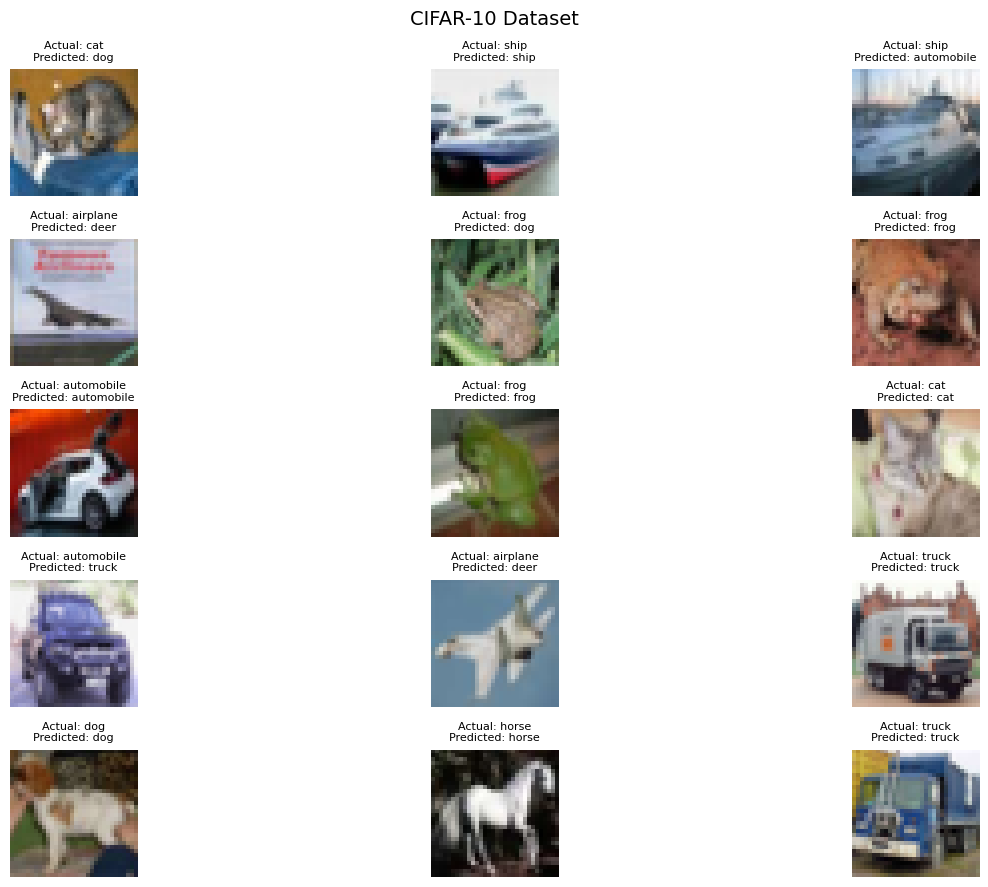

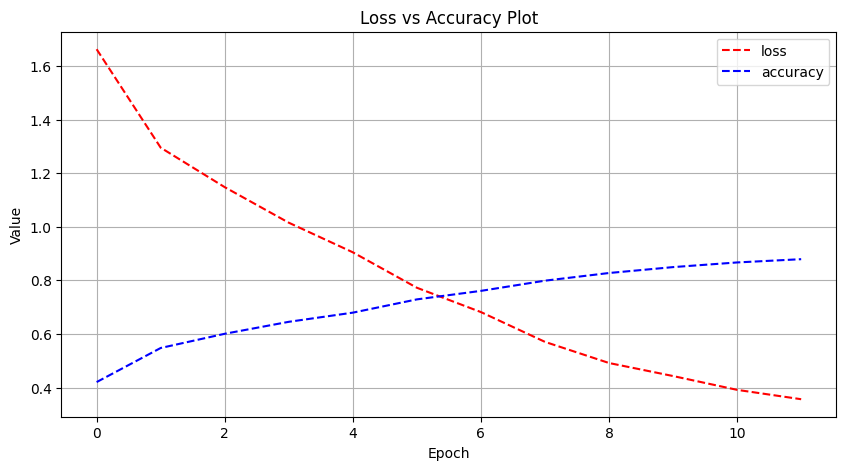

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Preprocess the data
train_images = train_images.astype(np.float64) / 255.0
test_images = test_images.astype(np.float64) / 255.0
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)
train_images, train_val_images, train_labels, train_val_labels = train_test_split(train_images, train_labels, test_size=0.4)

# Define the model
model = Sequential()
model.add(Input((32, 32, 3)))
model.add(Conv2D(32, (3, 3), strides=1, padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2), strides=1, padding='same'))
model.add(Conv2D(64, (3, 3), strides=1, padding='same'))
model.add(MaxPooling2D((2, 2), strides=1, padding='same'))
model.add(Conv2D(64, (3, 3), strides=1, padding='valid'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.06))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=12, verbose=1, batch_size=32, validation_data=(train_val_images, train_val_labels), validation_batch_size=16)

# Evaluate the model
loss, acc = model.evaluate(test_images, test_labels)
print(f"Loss: {loss*100:.3f}%\nAccuracy: {acc*100:.3f}%")

# Make predictions on the test set
predictions = model.predict(test_images)

# Plot the first 15 test images with their actual and predicted labels
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig, axes = plt.subplots(5, 3, figsize=(15, 9))

for i, ax in enumerate(axes.flat):
    if i < len(test_images):
        ax.imshow(test_images[i])
        true_label = class_labels[np.argmax(test_labels[i])]
        pred_label = class_labels[np.argmax(predictions[i])]
        ax.set_title(f"Actual: {true_label}\nPredicted: {pred_label}", fontsize=8)
        ax.axis('off')

plt.suptitle("CIFAR-10 Dataset", fontsize=14)
plt.tight_layout()
plt.show()

# Plot the loss vs accuracy graph
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], 'r--', label='loss')
plt.plot(history.history['accuracy'], 'b--', label='accuracy')
plt.title("Loss vs Accuracy Plot")
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

